In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve


# machine learning
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.pipeline import make_pipeline

# Exercise 1:
Consider a cell-phone company that has thousands of customers and is interested in predicting the likelihood that specific customers will be churning in the next 3 months.

In [129]:
churn_history_matrix = pd.read_csv('./features_churn_matrix.csv')
churn_history_matrix.head()

,is_male,num_interactions_with_cust_service,country,late_on_payment,age,years_in_contract,churned
0,True,0.0,GRE,False,41.0,3.240370,False
1,True,1.0,ISR,False,29.0,2.121320,False
2,False,0.0,GRE,False,34.0,3.240370,False
3,False,1.0,ISR,False,29.0,3.240370,False
4,True,0.0,ISR,False,33.0,3.082207,False


## 1A: Train a model to predict the likelihood of churning.

#### Make sure to create a train/test split (with 20% test data).

In [130]:
# Encode labels
le = preprocessing.LabelEncoder()
df_churn = churn_history_matrix.apply(le.fit_transform)

In [131]:
y = df_churn['churned']
X = df_churn.drop('churned', axis=1)
df_train, df_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [268]:
# Select the model below
clf = RandomForestClassifier()
# clf = LogisticRegression()
# clf = KNeighborsClassifier(n_neighbors = 7)
# clf = GradientBoostingClassifier(learning_rate=0.5,max_depth=5,n_estimators=20)

# Create a list of the feature column's names
clf.fit(df_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [269]:
score = clf.score(df_test, y_test)
print("Predicted accurately %.2f%% of results" % (100*score))

Predicted accurately 84.26% of results


## 1B: Print the confusion matrix

In [270]:
y_pred = clf.predict(df_test)
y_proba = clf.predict_proba(df_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[7878,  501],
       [1073,  548]])

## 1C: What are the accuracy, ROC-AUC, and average precision of your model?

In [271]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.94      0.91      8379
          1       0.52      0.34      0.41      1621

avg / total       0.82      0.84      0.83     10000



In [272]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy = %.2f%%' % (100*accuracy))

Accuracy = 84.26%


In [273]:
roc_auc = roc_auc_score(y_test, y_proba[:,1])
print('ROC-AUC = %.2f%%' % (100*roc_auc))

ROC-AUC = 76.56%


In [274]:
average_precision = average_precision_score(y_test, y_proba[:,1])
print('Average Precision = %.2f%%' % (100*average_precision))

Average Precision = 41.78%


## 1D: Display the AUC-ROC Curve and the PR Curve

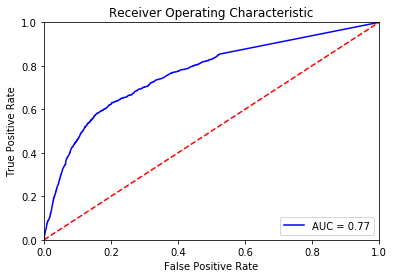

In [275]:
fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba[:,1], 1)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

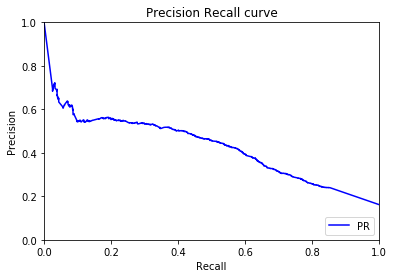

1661


In [276]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba[:,1], 1)
plt.title('Precision Recall curve')
plt.plot(recall, precision, 'b', label = 'PR')
plt.plot()
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()
print(len(recall))

## 1E: What is the precision at the 0.1 recall level?

In [261]:
recall_dot_one = recall[recall <= 0.1]
precision_dot_one = precision[len(precision)-len(recall_dot_one)]
print('Precision at 0.1 recall level = %.2f%%' % (100*precision_dot_one))

Precision at 0.1 recall level = 72.43%


## 1F: How would you describe the accuracy of your model to your boss in 1 minute?
#### Please write down a sentence or two explaining why you picked that metric.
#### (For example, "We picked accuracy because it captures both FP's and FN's.")

Accuracy is an important metric because it captures both the TPs and TNs. 

We may want to pick other metrics though if we get confronted to a specific question that tries to maximize one against the other.

## 1G: The Director of Marketing wants this model because they want to give a discount voucher to customers that are at risk of leaving. Previous research has concluced that giving these vouchers to the 5% of customers that are at most risk of churn is optimal.

## How would you present your metric with this new information? How would you explain to the Director of Marketing that your model can help in this campaign?
#### Please write down one sentence describing why you picked this metric.

We need to compute a threshold that caputres the 500 TPs with the highest probability of churning.

We would explain to the DoM that our model is able to predict the risk of churning for any customer, and therefore we are able to compute the minimum set of users that need to be contacted to include the 5% of customers most at risk.

## 1H: The CFO just heard that you have this awesome new model trained and ready to roll!  Sadly, she couldn't care less about those coupons.

## Instead, she would like to accurately predict the probabily that each customer will be churning so that the Finance team can accurately calculate revenue projections across many cohorts of users.

#### How would you present your metric with this new information? How would you explain to the CFO that your model can help in this campaign? Please write down one sentence describing why you picked this metric.

Our model is able to predict - to some extent - who will churn and who will stay. We will run our model on each cohort and calculate the churn rate as follows: 

$churn rate = \frac{n predicted churners}{cohort size}$